# Global Power Plant Database
## Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database


The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Dataset Link-
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv


In [315]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [316]:
df = pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [318]:
df.duplicated().sum()


0

In [319]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

### Intial Observation
- Data consist of infomation regarding only of Indian Power plants
- There are lot of missing values in the dataset
- There are no duplicate values in our dataset

In [320]:
# lets drop the irrelevant columns
df.drop(columns=["country","country_long",
                 'gppd_idnr','year_of_capacity_data','owner','url',
                 'other_fuel3','other_fuel2','estimated_generation_gwh','wepp_id','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)


In [321]:
# lets handle the columns with missing values
df.isna().sum()/len(df)*100

name                       0.000000
capacity_mw                0.000000
latitude                   5.071665
longitude                  5.071665
primary_fuel               0.000000
other_fuel1               78.169791
commissioning_year        41.896362
source                     0.000000
geolocation_source         2.094818
generation_gwh_2014       56.119074
generation_gwh_2015       53.472988
generation_gwh_2016       52.149945
generation_gwh_2017       51.488423
generation_gwh_2018       50.606395
generation_data_source    50.496141
dtype: float64

In [322]:
df.corr(numeric_only=True)

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,0.304087,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,0.129902,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,0.121910,0.013511,0.022760,0.050732,0.048678,0.045599
commissioning_year,0.304087,0.129902,0.121910,1.000000,0.160014,0.170363,0.193743,0.191367,0.193694
generation_gwh_2014,0.839094,0.060330,0.013511,0.160014,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,0.170363,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,0.193743,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,0.191367,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,0.193694,0.902781,0.934371,0.962073,0.985856,1.000000


## Analysis

<Axes: xlabel='count', ylabel='primary_fuel'>

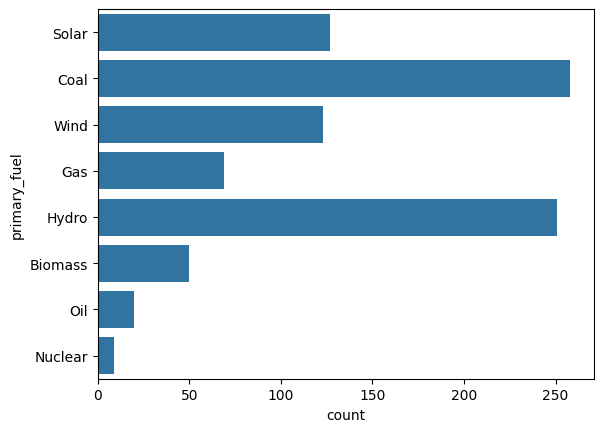

In [323]:
sns.countplot(df['primary_fuel'])

- Coal is used the most when it comes to being the primary fuel to the powerplant
- Hydro as a primary fuel is really close to coal when numbers are compared .
- Geolocation plays an important role while choosing between the two.
- Nuclear being the least used primary fuel in India as it obvious that controlling the nuclear reaction needs advances techniques and hence infrastuctures to attain it which is more expensive than any other kind of plant

In [324]:
df['source'].value_counts()

source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: count, Length: 191, dtype: int64

- Central Electricity Authority And CDM(Clean Development Mechanism) has the most contribution to the dataset regarding powerplants in India .


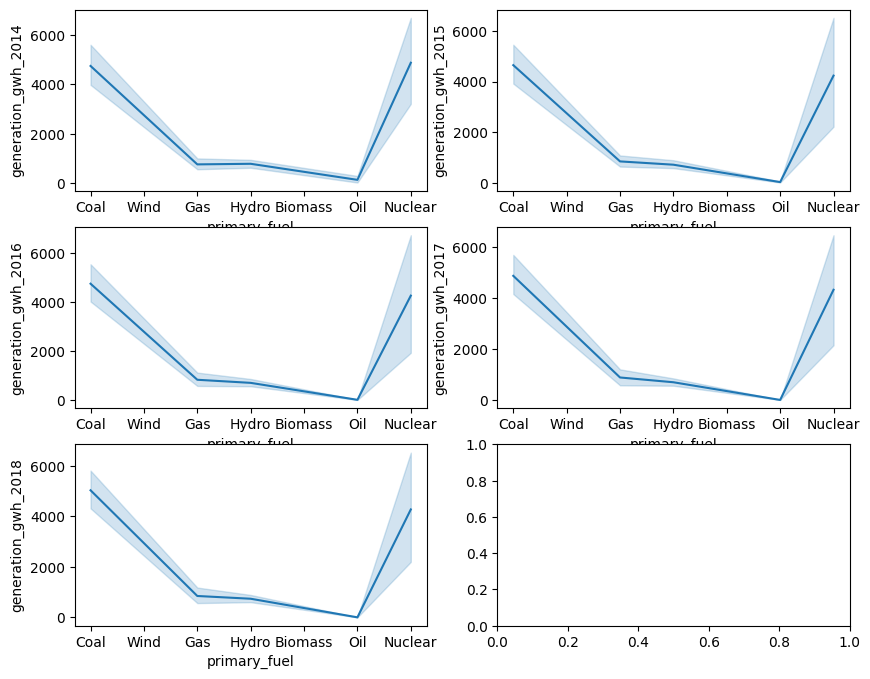

In [325]:
fig ,axes =plt.subplots(3, 2,figsize=(10,8))
for col, ax in zip(df.columns[9:14],axes.flatten()):
   sns.lineplot(x='primary_fuel',y=col,data=df,ax=ax)
plt.show()

- Not much difference in power generation across 2014-18

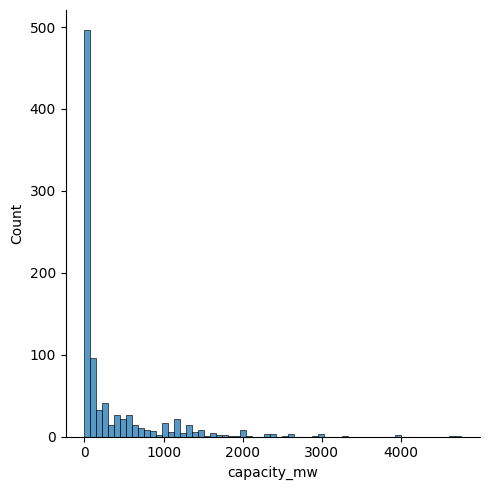

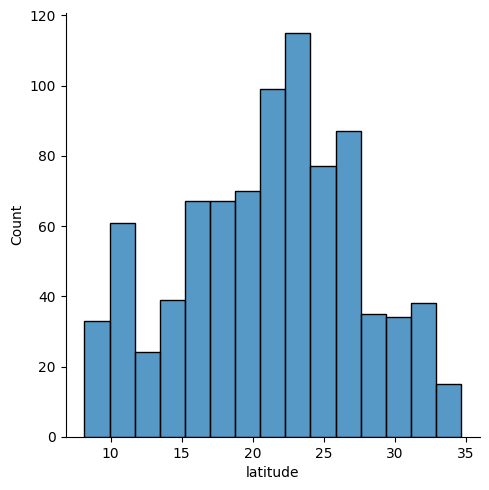

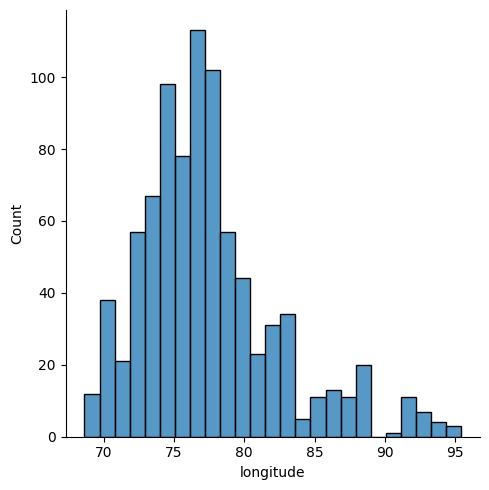

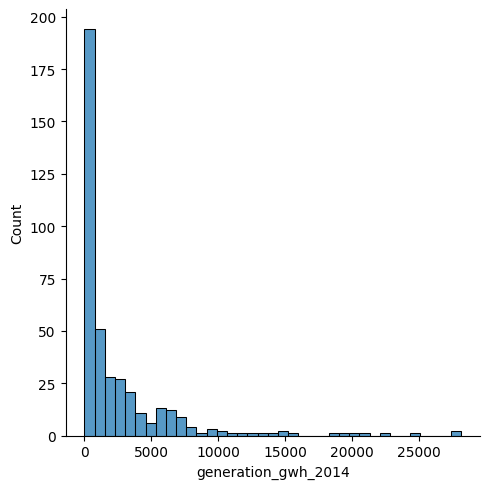

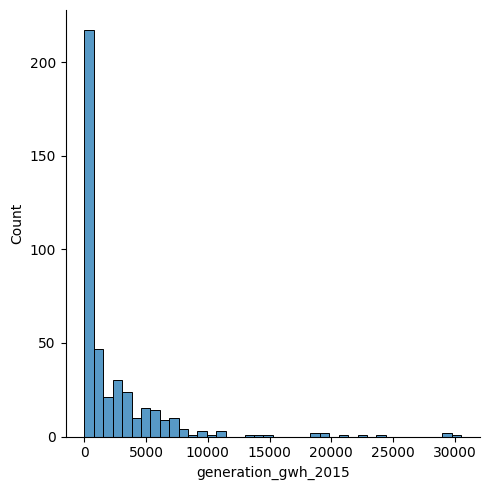

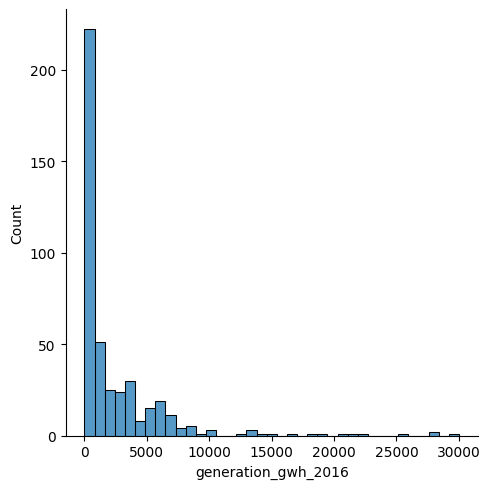

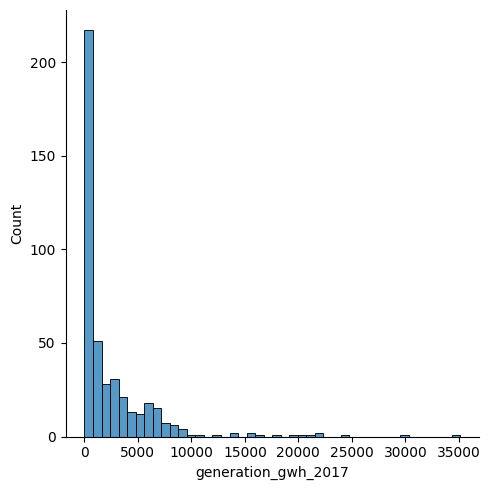

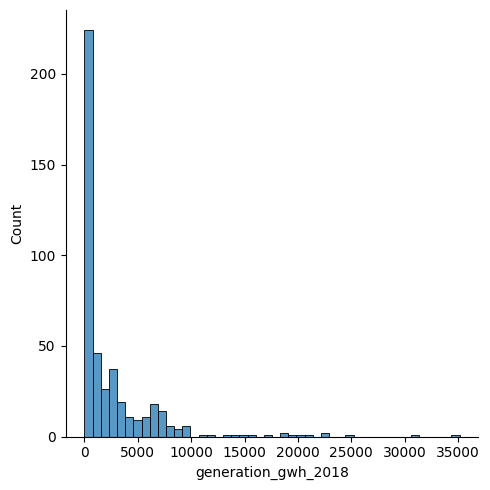

In [326]:
numerical_feature=['capacity_mw', 'latitude', 'longitude', 
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017','generation_gwh_2018']
for col in numerical_feature:
        sns.displot(df[col])
        plt.xlabel(col)
plt.tight_layout()

- Visible Skewness in the data which means there can be outliers

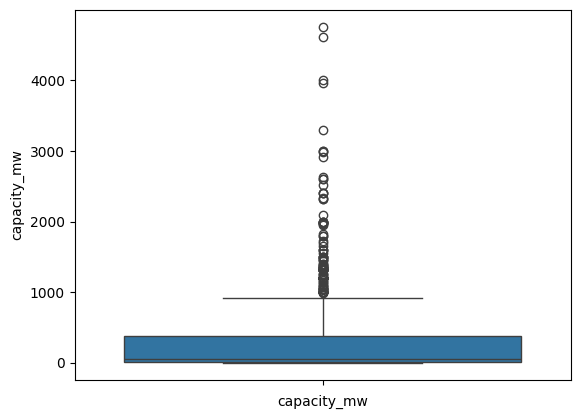

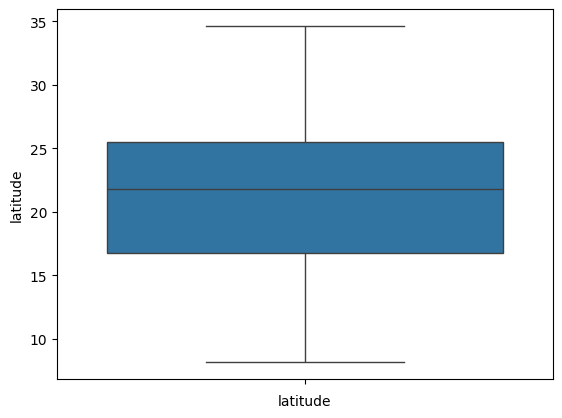

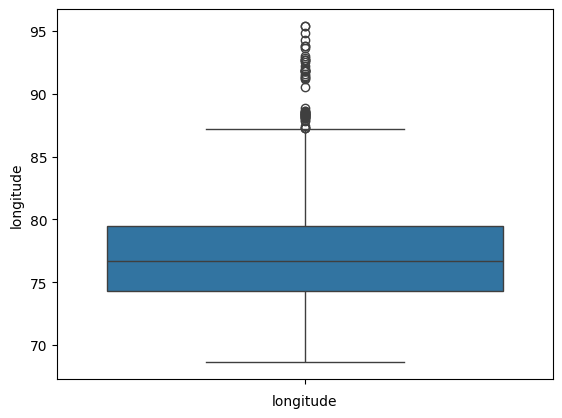

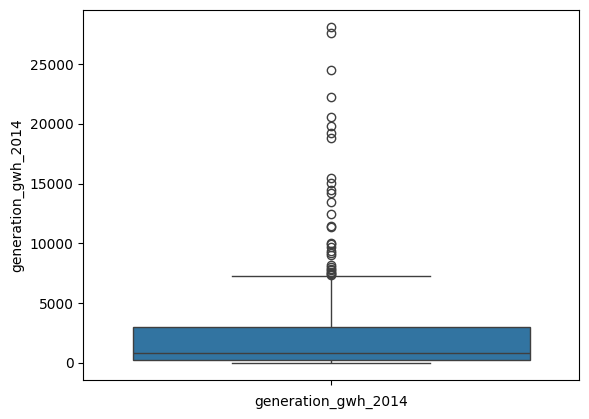

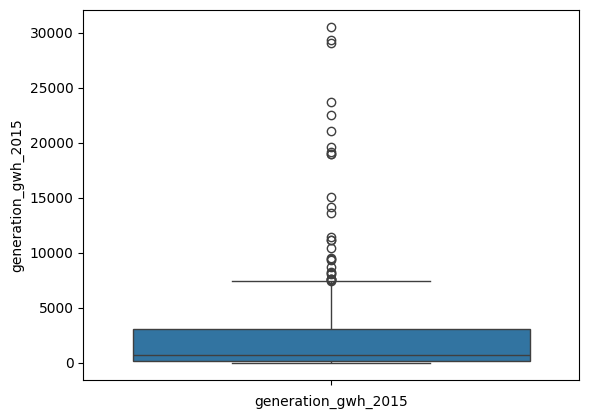

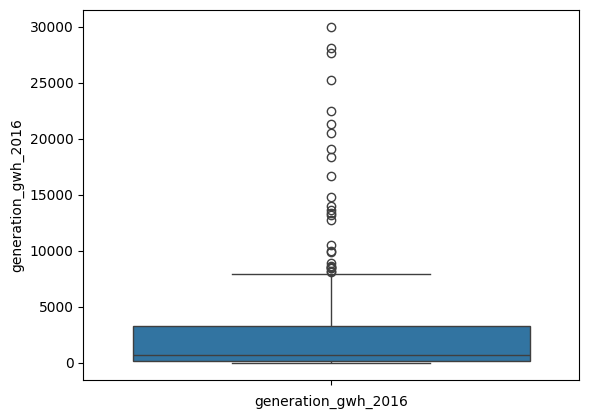

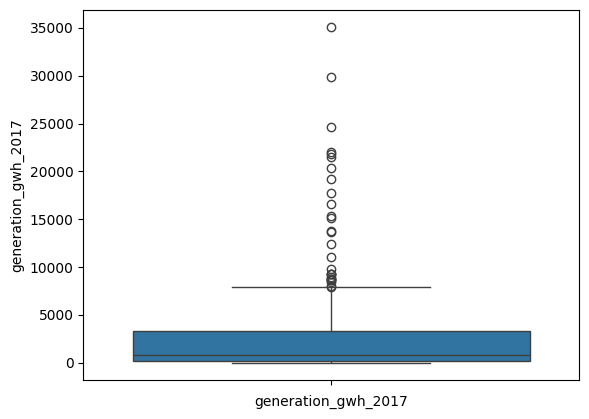

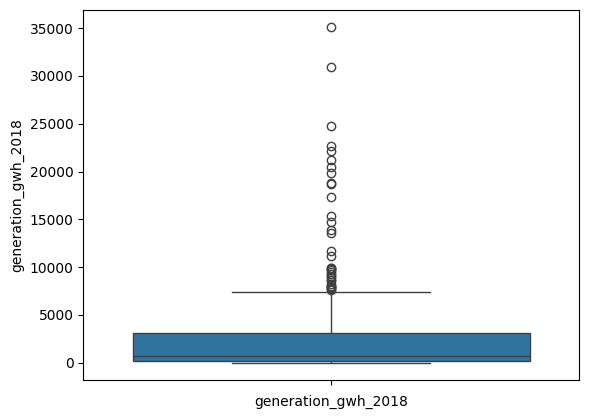

<Figure size 640x480 with 0 Axes>

In [327]:
numerical_feature=['capacity_mw', 'latitude', 'longitude', 
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017','generation_gwh_2018']
for col in numerical_feature:
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.show()
plt.tight_layout()

In [328]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [329]:
# Droping irrelevant  columns
df.drop(columns=['name','generation_data_source','source','geolocation_source',],axis=1,inplace=True)

In [330]:
df.isna().sum()/len(df)*100
        

capacity_mw             0.000000
latitude                5.071665
longitude               5.071665
primary_fuel            0.000000
other_fuel1            78.169791
commissioning_year     41.896362
generation_gwh_2014    56.119074
generation_gwh_2015    53.472988
generation_gwh_2016    52.149945
generation_gwh_2017    51.488423
generation_gwh_2018    50.606395
dtype: float64

- Trying to remove columns with more than 40 % of  missing values

In [331]:
for col in df.columns:
    if df[col].isna().sum()/len(df)*100 > 40:
        df.drop(col,axis=1,inplace=True)

In [332]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel'], dtype='object')

- removing columns with more than 40% missing values 
- Imputing the rest will not help as it will lead to more sythetic data as compared to original ones

- Central Electricity Authority And CDM(Clean Development Mechanism) has the most contribution to the dataset regarding powerplants in India .


In [333]:
df.isna().sum()

capacity_mw      0
latitude        46
longitude       46
primary_fuel     0
dtype: int64

In [334]:
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

# Model Training

- Classifying the primary fuel

In [335]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['primary_fuel_encoded'] = label_encoder.fit_transform(df['primary_fuel'])
df.drop('primary_fuel',axis=1,inplace=True)

In [336]:
# Splitting data in target and dependent feature
x = df.drop(['primary_fuel_encoded'], axis =1)
y = df['primary_fuel_encoded']

In [337]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

In [338]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, random_state=99, test_size=.3)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (634, 3)
Training target vector size: (634,)
Test feature matrix size: (273, 3)
Test target vector size: (273,)


Random Forest Accuracy: 0.7142857142857143
K-Nearest Neighbors Accuracy: 0.6336996336996337
SVM Accuracy: 0.5054945054945055
Decision Tree Accuracy: 0.6117216117216118
Logistic Regression Accuracy: 0.46153846153846156
Naive Bayes Accuracy: 0.45054945054945056


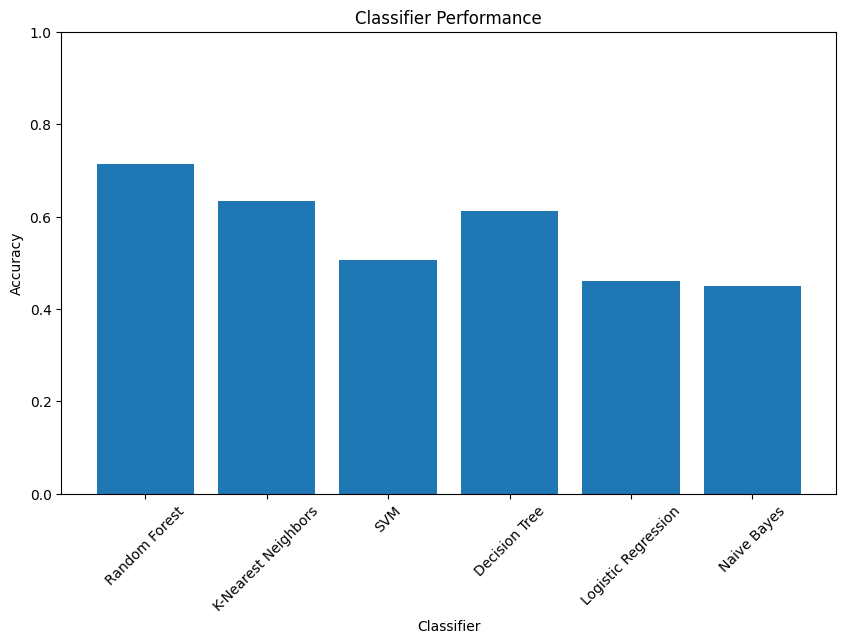

In [339]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier_model = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
} 
classifier_names = []
accuracy_scores = []

for classifier in classifier_model:
    classifier_name=classifier
    model = classifier_model[classifier] 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    classifier_names.append(classifier_name)
    accuracy_scores.append(accuracy)
    print(f"{classifier_name} Accuracy: {accuracy}")
    

# Plot classifier performance
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()    

## Hyper Parameter Tunning RandomForest Classifier

In [340]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Getting the best parameter
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Training with best parameter
best_classifier = RandomForestClassifier(random_state=42, **best_params)
best_classifier.fit(x_train, y_train)

# Predicition
y_pred = best_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Score: 0.6561554805649294
Test Accuracy: 0.6959706959706959


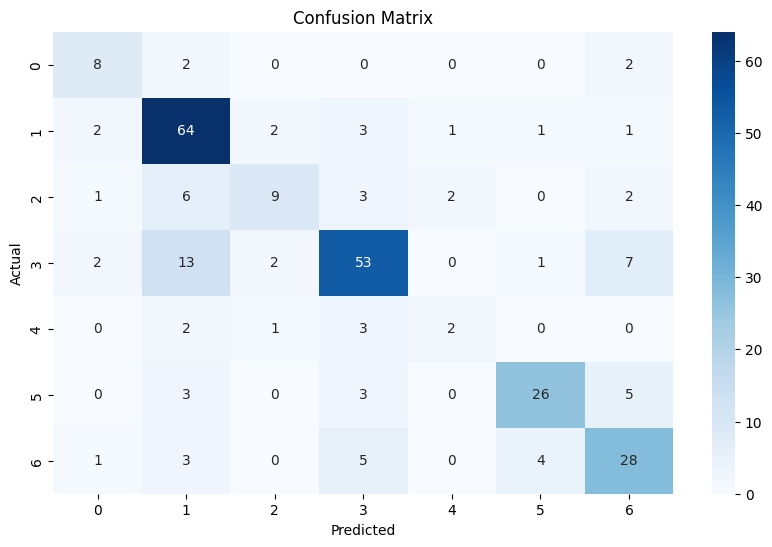

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.69      0.86      0.77        74
           2       0.64      0.39      0.49        23
           3       0.76      0.68      0.72        78
           5       0.40      0.25      0.31         8
           6       0.81      0.70      0.75        37
           7       0.62      0.68      0.65        41

    accuracy                           0.70       273
   macro avg       0.64      0.61      0.61       273
weighted avg       0.70      0.70      0.69       273



In [341]:
from sklearn.metrics import confusion_matrix,classification_report

# plot confusion matrix 
fig = plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Classification Report
report = classification_report(y_test, y_pred)
print(report)

In [343]:
# Saving the model
import joblib
joblib.dump(best_classifier,'random_forest_classifier_model.pkl')

['random_forest_classifier_model.pkl']

- Predicting the power capacity

In [345]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


regressor_models={    
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'ElasticNet':ElasticNet(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'SVR':SVR(),
    'KNeighborsRegressor':KNeighborsRegressor()    
}

mse_scores = []

r2_scores = []


for regressor in regressor_models:
    regressor_name = regressor
    model = regressor_models[regressor]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    # Getting MSE and R2 scores
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)


    # Storing Average MSE and R2 scores for each model
    mse_scores.append(mse)
    r2_scores.append(r2)


Report = {"Regressors":regressor_models.keys(),"MSE": mse_scores,"R2":r2_scores} 
pd.DataFrame(Report)


,Regressors,MSE,R2
0,LinearRegression,3.875716,0.256008
1,Ridge,3.876087,0.255937
2,Lasso,5.230447,-0.004049
3,ElasticNet,4.675694,0.102443
4,DecisionTreeRegressor,3.702483,0.289263
5,RandomForestRegressor,1.990236,0.617950
6,AdaBoostRegressor,2.902697,0.442791
7,GradientBoostingRegressor,2.573424,0.506000
8,SVR,3.300683,0.366393
9,KNeighborsRegressor,2.355751,0.547785


## HyperParameter Tuning

In [347]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10]

}


rf_model= RandomForestRegressor()

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics using the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print('Best Hyperparameters:', best_model)
print('Mean Squared Error (MSE):', mse)
print('R-squared Score (R2 Score):', r2)

Best Hyperparameters: RandomForestClassifier(n_estimators=300)
Mean Squared Error (MSE): 2.8827838827838828
R-squared Score (R2 Score): 0.4466140199048031


In [348]:
# Saving the model
import joblib
joblib.dump(best_model,'power_capacity.pkl')

['rf.pkl']